<a href="https://colab.research.google.com/github/jisang93/KOR_Sentiment_Analysis/blob/master/Data_Preprocessing/Reply_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from tqdm import tqdm
import os, csv

# **네이버 영화**

In [2]:
file_path = os.path.join('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Movie', f"ratings.txt")
movie_reply = []
with open(file_path, "r", encoding="utf-8") as r:
    reader = csv.reader(r, delimiter="\t")
    next(reader, None)
    for line in reader:
        movie_content = {'content' : 0, 'label' : 0}
        movie_content['content'] = line[1]
        movie_content['label'] = line[2]
        movie_reply.append(movie_content)

In [3]:
movie = pd.DataFrame(movie_reply)
movie.head()

,content,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [4]:
for i in tqdm(range(len(movie))):
    if movie['label'][i] == '0':
        movie['label'][i] = int(-1)
    if movie['label'][i] == '1':
        movie['label'][i] = int(1)
movie

100%|██████████| 200000/200000 [02:54<00:00, 1146.79it/s]


,content,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
199995,포켓 몬스터 짜가 ㅡㅡ;;,-1
199996,쓰.레.기,-1
199997,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,-1
199998,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,-1


In [5]:
len(movie[movie['label']==-1]), len(movie[movie['label']==1])

(100000, 100000)

In [6]:
len(movie)

200000

# **네이버 스포츠**

In [4]:
sports_reply1 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Sports/naver_sportnews_reply_1.csv', encoding='utf-8')
len(sports_reply1)

2119

In [5]:
sports_content1 = sports_reply1[sports_reply1['like']  >= 3]
sports_content1 = sports_content1[sports_content1['dislike']  >= 3]
sports_content1 = sports_content1.reset_index()
len(sports_content1)

229

In [6]:
sports_reply2 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Sports/naver_sportnews_reply_2.csv', encoding='utf-8')
len(sports_reply2)

1782

In [7]:
a = pd.concat([sports_reply1, sports_reply2], axis=0)
a = a.reset_index()
a = a.rename({'contents':'content'}, axis='columns')
sports_content = a[['content', 'like', 'dislike']]
len(sports_content)

3901

In [8]:
sports_content['label'] = 0
for i in range(len(sports_content)):
    if sports_content['like'][i] / (sports_content['like'][i] + sports_content['dislike'][i]) >= 0.8:
        sports_content['label'][i] = int(1)
    elif sports_content['like'][i] / (sports_content['like'][i] + sports_content['dislike'][i]) <= 0.2:
        sports_content['label'][i] = int(-1)
    else:
        sports_content['label'][i] = int(0)

sports_content.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,content,like,dislike,label
0,"""수비 잘하면 선발 기회 많아지고 많아지다보면 타격경험 쌓여 타격도 자연스레 늘게 ...",1,0,1
1,"""찬호야 넌 대단하고 잘하구나 기아에 없었다면 안되겠다""",3,0,1
2,"""박찬호 수비 보러 오라고 해서 왔는데....\n\n이게 호수비냐? ㅋㅋㅋㅋㅋㅋㅋㅋ...",0,11,-1
3,"""찬호야 ~~수비는 kbo 원탑이다*^^* 아쉬운건 스윙할때 부담 갖지말고 ...",1,1,0
4,"""복덩이 박찬호! 어디갓다 인제 온거야.. 내년이 더 기대되는 멋진 찬호다!""",8,0,1


In [9]:
sports = sports_content[['content', 'label']]
sports.head()

,content,label
0,"""수비 잘하면 선발 기회 많아지고 많아지다보면 타격경험 쌓여 타격도 자연스레 늘게 ...",1
1,"""찬호야 넌 대단하고 잘하구나 기아에 없었다면 안되겠다""",1
2,"""박찬호 수비 보러 오라고 해서 왔는데....\n\n이게 호수비냐? ㅋㅋㅋㅋㅋㅋㅋㅋ...",-1
3,"""찬호야 ~~수비는 kbo 원탑이다*^^* 아쉬운건 스윙할때 부담 갖지말고 ...",0
4,"""복덩이 박찬호! 어디갓다 인제 온거야.. 내년이 더 기대되는 멋진 찬호다!""",1


# **예능 프로그램**

In [10]:
entertain1 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/1ngith2day.csv', encoding='utf-8')
entertain2 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/knownbrothers.csv', encoding='utf-8')
entertain3 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/naverTV_talk_tvnstranger_1_2000.csv', encoding='utf-8')
entertain4 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/singlelife_labeling.csv', encoding='utf-8')
entertain5 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/street.csv', encoding='utf-8')
entertain6 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/ugly ducks.csv', encoding='utf-8')
entertain7 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Entertainment/whyplay.csv', encoding='utf-8')

In [11]:
a = pd.concat([entertain1, entertain2, entertain3, entertain4, entertain5, entertain6, entertain7], axis=0)
a = a.reset_index()
ent_content = a[['0', '1', '2']]
len(ent_content)

107984

In [12]:
ent_content = ent_content[ent_content['1'].isnull()==False]
ent_content = ent_content.rename({'0':'content', '1':'label'}, axis='columns')
ent_content = ent_content.reset_index()
entertainment = ent_content[['content', 'label']]
entertainment = entertainment.dropna()
entertainment = entertainment.reset_index()
entertainment = entertainment.drop(['index'], axis=1)
entertainment.head()

,content,label
0,"""오늘 글수 19개 입니다.ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...",1
1,"""일요일 또 언제 기다리지""",1
2,"""너무 재미있게 보고 있어요 예능 안 보는 편인데 하나 봤다가 정주행 중이에요 ㅠㅠ""",1
3,"""쌓아뒀다 한꺼번에 털어주자 악플러시키""",-1
4,"""6분 멤버의 눈물 그 중에 아이 키우는 연정훈 문세윤 두분의 눈물... 모...",0


In [13]:
for i in tqdm(range(len(entertainment))):
    if entertainment['label'][i] == 'q':
        entertainment['label'][i] = int(1)
    elif type(entertainment['label'][i]) != 'int':
        entertainment['label'][i] = int(entertainment['label'][i])
    else:
        pass
entertainment.head()

100%|██████████| 34909/34909 [00:06<00:00, 5670.43it/s]


,content,label
0,"""오늘 글수 19개 입니다.ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...",1
1,"""일요일 또 언제 기다리지""",1
2,"""너무 재미있게 보고 있어요 예능 안 보는 편인데 하나 봤다가 정주행 중이에요 ㅠㅠ""",1
3,"""쌓아뒀다 한꺼번에 털어주자 악플러시키""",-1
4,"""6분 멤버의 눈물 그 중에 아이 키우는 연정훈 문세윤 두분의 눈물... 모...",0


# **드라마**

In [14]:
drama1 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Drama/itaewonclass.csv', encoding='utf-8')
drama2 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Drama/psychookay.csv', encoding='utf-8')
drama3 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/국어 경진대회/Data Set/Drama/smartdoctorlice.csv', encoding='utf-8')

In [15]:
a = pd.concat([drama1, drama2, drama3], axis=0)
a = a.reset_index()
drama_content = a[['0', '1', '2']]
len(drama_content)

15004

In [16]:
drama_content = drama_content[drama_content['1'].isnull()==False]
drama_content = drama_content.rename({'0':'content', '1':'label'}, axis='columns')
drama_content = drama_content.reset_index()
drama = drama_content[['content', 'label']]
drama_content = drama_content.reset_index()
drama_content = drama_content.drop(['index'], axis=1)
drama.head()

,content,label
0,"""이클오스트 갠적으로 그때그아인 조은데 사실 모든노래가찐""",1.0
1,"""요즘 계속 이클ost듣고 명장면 돌려보다보니 정주행 하고싶어지네요""",1.0
2,"""출첵! 이번주도 건강하게 무탈하게.ㅎㅇㅌ""",1.0
3,"""진짜 마지막 식상한 납치씬만 없었으면 더 좋았을건데""",1.0
4,"""ILL 이서로이럽""",1.0


In [17]:
type(drama['label'][0])

numpy.float64

In [18]:
b = []
for i in drama['label'].to_list():
    b.append(int(i))

b[:5]

[1, 1, 1, 1, 1]

In [19]:
 drama['new_label'] = 0
 
 for i in tqdm(range(len(drama))):
    if b[i] == 'q':
        drama['new_label'][i] = int(1)
    else:
        drama['new_label'][i] = int(b[i])
new_drama = drama[['content', 'new_label']]
new_drama.head()

  0%|          | 0/13057 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 13057/13057 [00:00<00:00, 17336.17it/s]


,content,new_label
0,"""이클오스트 갠적으로 그때그아인 조은데 사실 모든노래가찐""",1
1,"""요즘 계속 이클ost듣고 명장면 돌려보다보니 정주행 하고싶어지네요""",1
2,"""출첵! 이번주도 건강하게 무탈하게.ㅎㅇㅌ""",1
3,"""진짜 마지막 식상한 납치씬만 없었으면 더 좋았을건데""",1
4,"""ILL 이서로이럽""",1


In [20]:
new_drama = new_drama.rename({'new_label':'label'}, axis='columns')
new_drama = new_drama.reset_index()
drama = new_drama.drop(['index'], axis=1)
drama.head()

,content,label
0,"""이클오스트 갠적으로 그때그아인 조은데 사실 모든노래가찐""",1
1,"""요즘 계속 이클ost듣고 명장면 돌려보다보니 정주행 하고싶어지네요""",1
2,"""출첵! 이번주도 건강하게 무탈하게.ㅎㅇㅌ""",1
3,"""진짜 마지막 식상한 납치씬만 없었으면 더 좋았을건데""",1
4,"""ILL 이서로이럽""",1


# **전체 데이터 전처리**

In [21]:
dataset = pd.concat([sports, entertainment, drama], axis=0) # movie 제외
dataset = dataset.reset_index()
dataset = dataset.drop(['index'], axis=1)
dataset

,content,label
0,"""수비 잘하면 선발 기회 많아지고 많아지다보면 타격경험 쌓여 타격도 자연스레 늘게 ...",1
1,"""찬호야 넌 대단하고 잘하구나 기아에 없었다면 안되겠다""",1
2,"""박찬호 수비 보러 오라고 해서 왔는데....\n\n이게 호수비냐? ㅋㅋㅋㅋㅋㅋㅋㅋ...",-1
3,"""찬호야 ~~수비는 kbo 원탑이다*^^* 아쉬운건 스윙할때 부담 갖지말고 ...",0
4,"""복덩이 박찬호! 어디갓다 인제 온거야.. 내년이 더 기대되는 멋진 찬호다!""",1
...,...,...
51862,"""99년생 아닐까요?""",0
51863,"""기념으로 재작ㅋㅋㅋㅋ""",0
51864,"""ㅋㅋㅋㅋㅋㅋㅋㅋㅋ멋있어유ㅠ""",0
51865,"""이익준=조정석""",0


## **데이터셋 확인**

Text(0, 0.5, 'Number of Reply')

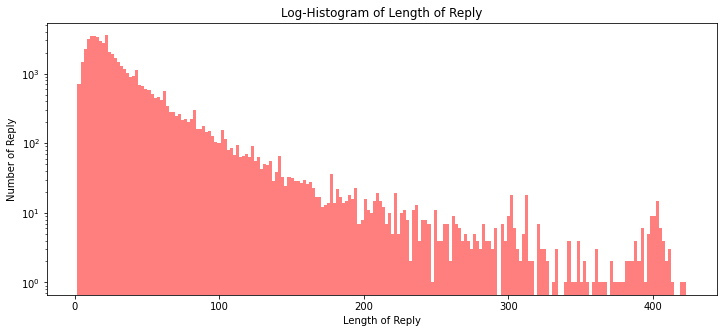

In [22]:
import matplotlib.pyplot as plt

# 각 데이터의 문자 길이
dataset_length = dataset['content'].apply(len)

# 각 리뷰의 길이 시각화
plt.figure(figsize=(12,5))
# 히스토그램 이용
plt.hist(dataset_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of Length of Reply')
plt.xlabel('Length of Reply')
plt.ylabel('Number of Reply')

Text(0, 0.5, 'Number of Reply')

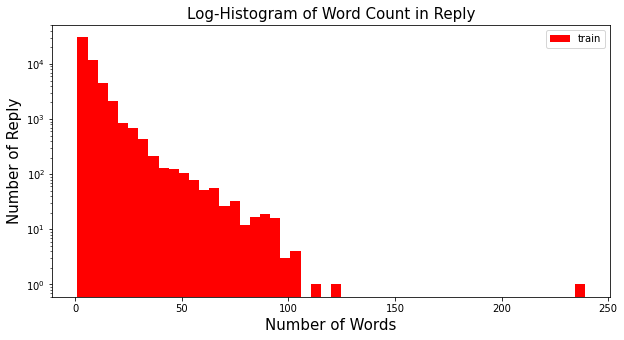

In [23]:
# 각 리뷰당 단어의 개수
dataset_word_counts = dataset['content'].apply(lambda x:len(x.split(' ')))

# 단어의 개수 시각화
plt.figure(figsize=(10, 5))
plt.hist(dataset_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of Word Count in Reply', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of Words', fontsize=15)
plt.ylabel('Number of Reply', fontsize=15)

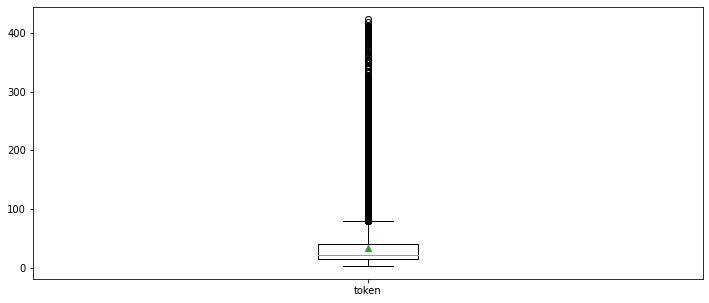

In [24]:
# 박스 플롯을 이용해 문장 내 단어수 확인
plt.figure(figsize=(12,5))
plt.boxplot(dataset_length, labels=['token'], showmeans=True)

plt.show()

## **데이터 전처리**

In [25]:
import re

for i in tqdm(range(len(dataset))):
    dataset['content'][i] = dataset['content'][i].replace('"', '').replace('\\t', '').replace('\\n', '').replace('ㅋㅋㅋ', 'ㅋ')
    if len(dataset['content'][i]) >= 5:
        pass
    else:
        dataset['content'][i] = 0

dataset.head()

100%|██████████| 51867/51867 [00:51<00:00, 998.04it/s]


,content,label
0,"""수비 잘하면 선발 기회 많아지고 많아지다보면 타격경험 쌓여 타격도 자연스레 늘게 ...",1
1,"""찬호야 넌 대단하고 잘하구나 기아에 없었다면 안되겠다""",1
2,"""박찬호 수비 보러 오라고 해서 왔는데....\n\n이게 호수비냐? ㅋㅋㅋㅋ\n\n...",-1
3,"""찬호야 ~~수비는 kbo 원탑이다*^^* 아쉬운건 스윙할때 부담 갖지말고 ...",0
4,"""복덩이 박찬호! 어디갓다 인제 온거야.. 내년이 더 기대되는 멋진 찬호다!""",1


In [26]:
dataset = dataset[dataset['content'] != 0]
dataset = dataset[dataset['label'] != 0 ] # 이진분류를 위해 0 라벨 제거
dataset = dataset.reset_index()
dataset = dataset.drop(['index'], axis=1)
len(dataset)

50984

In [27]:
for i in tqdm(range(len(dataset))):
    if dataset['label'][i] == 1:
        pass
    elif dataset['label'][i] == 0:
        pass
    elif dataset['label'][i] == -1:
        pass
    else:
        print(i)

dataset.head()

 76%|███████▌  | 38639/50984 [00:01<00:00, 36349.82it/s]

33934
34610


100%|██████████| 50984/50984 [00:01<00:00, 38981.69it/s]


,content,label
0,"""수비 잘하면 선발 기회 많아지고 많아지다보면 타격경험 쌓여 타격도 자연스레 늘게 ...",1
1,"""찬호야 넌 대단하고 잘하구나 기아에 없었다면 안되겠다""",1
2,"""박찬호 수비 보러 오라고 해서 왔는데....\n\n이게 호수비냐? ㅋㅋㅋㅋ\n\n...",-1
3,"""찬호야 ~~수비는 kbo 원탑이다*^^* 아쉬운건 스윙할때 부담 갖지말고 ...",0
4,"""복덩이 박찬호! 어디갓다 인제 온거야.. 내년이 더 기대되는 멋진 찬호다!""",1


In [28]:
dataset['label'][33934] = -1
dataset['label'][34610] = -1

Text(0, 0.5, 'Number of Reply')

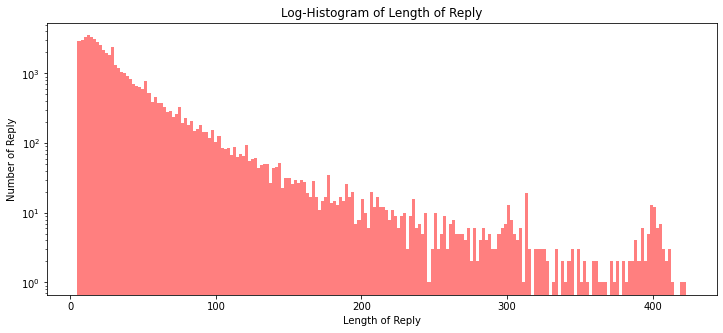

In [29]:
# 각 데이터의 문자 길이
dataset_length = dataset['content'].apply(len)

# 각 리뷰의 길이 시각화
plt.figure(figsize=(12,5))
# 히스토그램 이용
plt.hist(dataset_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of Length of Reply')
plt.xlabel('Length of Reply')
plt.ylabel('Number of Reply')

Text(0, 0.5, 'Number of Reply')

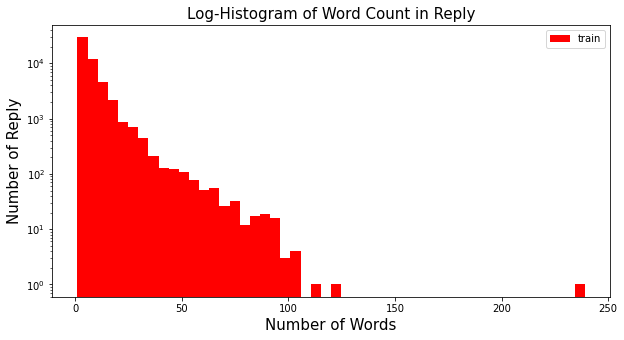

In [30]:
# 각 리뷰당 단어의 개수
dataset_word_counts = dataset['content'].apply(lambda x:len(x.split(' ')))

# 단어의 개수 시각화
plt.figure(figsize=(10, 5))
plt.hist(dataset_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of Word Count in Reply', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of Words', fontsize=15)
plt.ylabel('Number of Reply', fontsize=15)

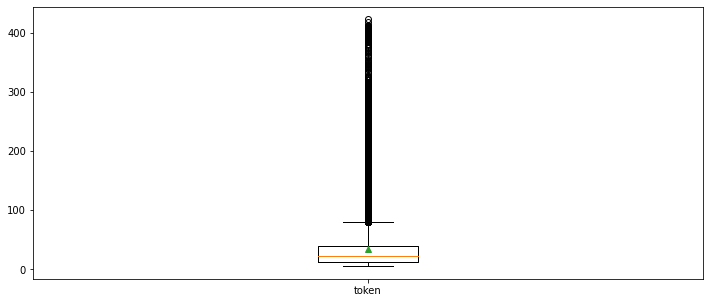

In [31]:
# 박스 플롯을 이용해 문장 내 단어수 확인
plt.figure(figsize=(12,5))
plt.boxplot(dataset_length, labels=['token'], showmeans=True)

plt.show()

# **학습 데이터, 테스트 데이터 형성**

In [93]:
train_data = dataset.sample(frac=0.8, random_state=2020)
test_data = dataset.drop(train_data.index)
len(dataset), len(train_data), len(test_data)

(50984, 40787, 10197)

In [94]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')